In [1]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np


In [2]:
data = pd.read_csv('data/dry-bean.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER



Splitting data into training / test allows me to test the accuracy of my model on unseend data.

this split is random however to mainatin class raitios i have used stratisfied sampling.

random state = 1 allows randomisation to remain deterministic, this ensures that test data dos not bleed into the training data

In [3]:
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)
print(X_train.shape, y_train.shape)


(10888, 16) (10888,)


In [4]:
clf = MLPClassifier(random_state=1, max_iter=700,
                    activation="relu",
                    hidden_layer_sizes=(16, 50, 50, 50, 50, 50, 50, 50, 50, 1000),
                    verbose=True,
                    solver="adam"
                    
                    ).fit(X_train, y_train)
clf.predict_proba(X_test[:1])


Iteration 1, loss = 12.66082618
Iteration 2, loss = 2.51376743
Iteration 3, loss = 1.83048134
Iteration 4, loss = 1.85017147
Iteration 5, loss = 1.73089136
Iteration 6, loss = 1.76155058
Iteration 7, loss = 1.64779691
Iteration 8, loss = 1.57989178
Iteration 9, loss = 1.61812060
Iteration 10, loss = 1.46968664
Iteration 11, loss = 1.46320487
Iteration 12, loss = 1.40312720
Iteration 13, loss = 1.40823309
Iteration 14, loss = 1.31442262
Iteration 15, loss = 1.30679037
Iteration 16, loss = 1.35653581
Iteration 17, loss = 1.32568656
Iteration 18, loss = 1.46331949
Iteration 19, loss = 1.25495959
Iteration 20, loss = 1.22320198
Iteration 21, loss = 1.20562069
Iteration 22, loss = 1.15449488
Iteration 23, loss = 1.11101368
Iteration 24, loss = 1.21158003
Iteration 25, loss = 1.45735992
Iteration 26, loss = 1.19124863
Iteration 27, loss = 1.10786521
Iteration 28, loss = 1.07418124
Iteration 29, loss = 1.00939059
Iteration 30, loss = 1.15860377
Iteration 31, loss = 1.02302161
Iteration 32, lo

array([[9.49180316e-03, 1.03691803e-06, 3.52595297e-04, 1.25009740e-01,
        1.88375217e-02, 1.19188463e-01, 7.27118840e-01]])

Multiclass classification requires One verses Rest in order to compare ROC_AUC 

In [6]:
import pickle

filename = "models/dry-bean-nn.pickle"
pickle.dump(clf, open(filename, "wb"))


['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


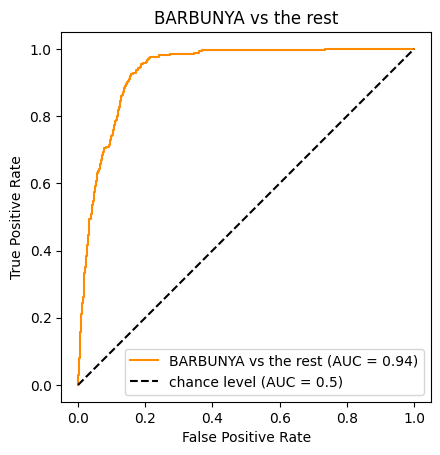

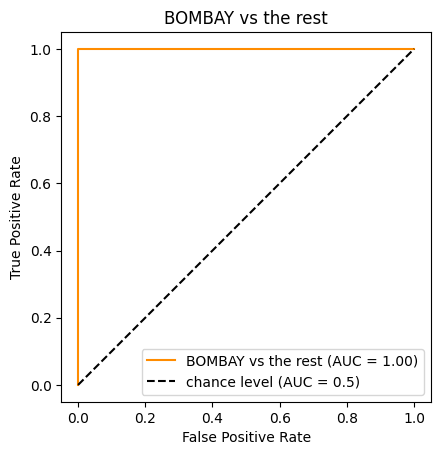

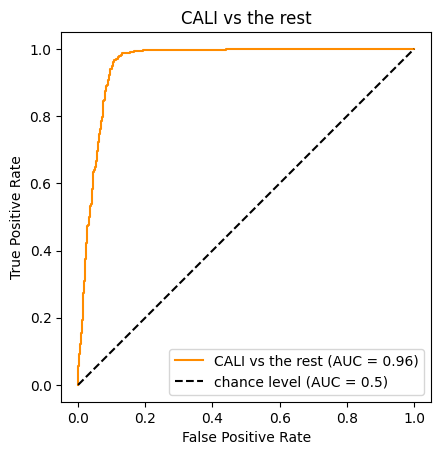

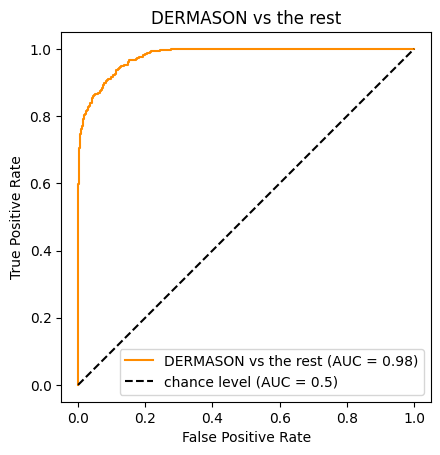

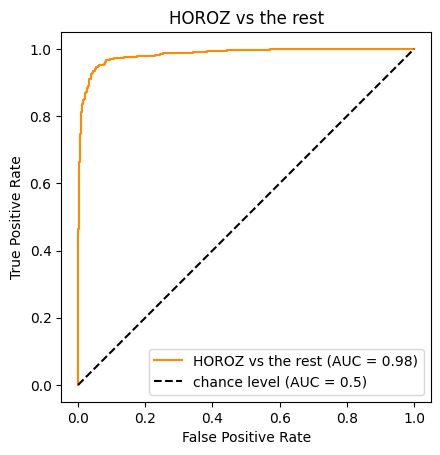

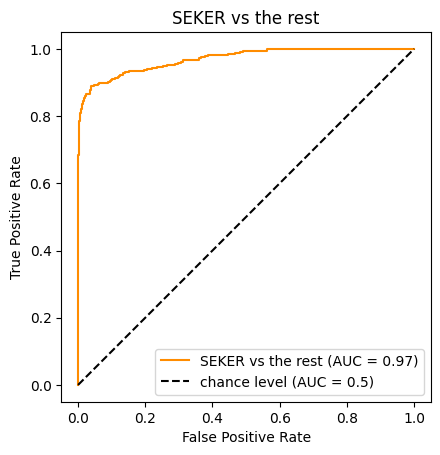

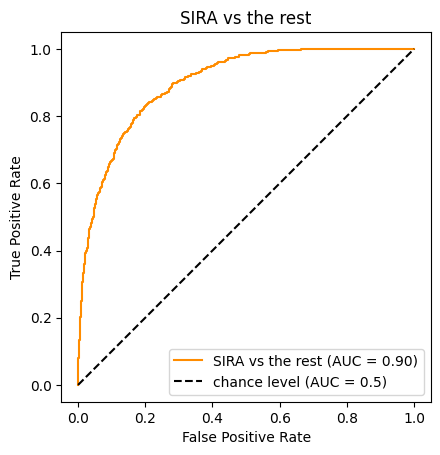

In [5]:

from sklearn.preprocessing import LabelBinarizer

y_score = clf.predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)


print(label_binarizer.classes_)

for class_of_interest in label_binarizer.classes_:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{class_of_interest} vs the rest")
    plt.legend()
    plt.show()
